# Appendix A: Code templates

Here templates are provided for various codes useful in reactor design:

1. Non-linear system of equations solver
2. Ordinary differential equations system solver

## 1. Non-linear algebraic equations system solver

In [1]:
########## Non-linear system of equations solver ##########

###### Import packages

import numpy as np
import pandas as pd
import scipy.optimize as opt

###### Specify known values

### Constants
Kc  = 0.1      # mol / L
yA_0 = 1.0     # mol / mol
P   = 3.0      # atm
R   = 0.082    # atm L / mol K
T   = 340      # K

###### Define system of equations

def alg(U):
    
    ### Redefine inputs
    CA0 = U[0]
    Xe = U[1]
    
    ### Define equations
    setzero = np.zeros(len(U))
    setzero[0] = CA0-yA_0*P/R/T
    setzero[1] = Xe - (Kc*(1-Xe)/(4*CA0))**0.5
    
    ### Reorganize list to fit required dimensions 
    setzero = np.array(setzero).tolist()
    
    return setzero

###### Solve based on initial guesses

### Initial guesses
varguess = [0.5,0.5]

### Solver
U = opt.fsolve(alg,varguess)   # Enter function vollowed by variable guesses
U = np.array(U)                # Convert to numpy array for convenience

### Verify that solution was achieved
zerocheck = alg(U)
print("Zerocheck: ",zerocheck)

### Save results in dataframe
soln = pd.DataFrame(['Var 1','Var 2'],columns = ['Variables'])
soln[['Values']] = pd.DataFrame(U)
soln

Zerocheck:  [0.0, 0.0]


,Variables,Values
0,Var 1,0.107604
1,Var 2,0.379644


## 2. Ordinary differential equations system solver

In [2]:
########## Ordinary differential equations system solver ##########

###### Import packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

###### Specify known values

c1 = 1
c2 = 0.2

###### Set initial conditions of independent variables U

U0 = [10,0] # In this example U0[0] is variable A and U0[1] is variable B

###### Determine integration limits via independent variable array tlim
tlim = (0,10)
tlist = np.linspace(tlim[0],tlim[1],num=101) # Not essential--specifies intervals along tlim to store U values

###### Define differential equations along with additional required calculations

def diff(t,U):
    
    # Assign values to inputs if desired
    A = U[0]
    B = U[1]
    
    # Define equations
    dU=np.zeros(len(U))
    dU[0] = c1 - c2 * A**0.5
    dU[1] = c2 * A**0.5
    
    # Reorganize list to fit required dimensions 
    dU = np.array(dU).tolist()
    
    return dU

###### Integrate

soln = solve_ivp(diff,tlim,U0,t_eval=tlist)

### Obtain output dependent variable array U and independent variable array t

U = soln.y.T # T makes transpose; not essential but easy for input to dataframe
t = soln.t

A = U[:,0] # Define individual variables within U if desired
B = U[:,1]

### Define pandas dataframe with outputs

soln_df = pd.DataFrame(t,columns = ['Time (s)'])
soln_df[['A (units)','B (units)']] = pd.DataFrame(U)

### Save dataframe to a csv
#soln_df.to_csv('ODE_solver_output.csv')

### Report dataframe
soln_df

,Time (s),A (units),B (units)
0,0.0,10.000000,0.000000
1,0.1,10.036696,0.063304
2,0.2,10.073277,0.126723
3,0.3,10.109743,0.190257
4,0.4,10.146094,0.253906
...,...,...,...
96,9.6,13.064312,6.535688
97,9.7,13.091984,6.608016
98,9.8,13.119581,6.680419
99,9.9,13.147101,6.752899


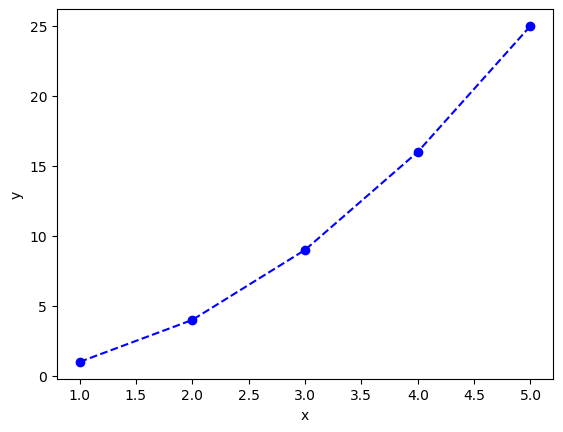

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xvals = np.array([1,2,3,4,5])
yvals = xvals**2
plt.plot(xvals,yvals,'--ob')
plt.xlabel('x')
plt.ylabel('y')

plt.show()